In [1]:
import numpy as np
import sqlite3 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

In [12]:
con = sqlite3.connect("rot_simple_v4.1_10yrs.db")
#con = sqlite3.connect("../../baseline/baseline_v4.1_10yrs.db")

data = pd.read_sql("select rotTelPos,filter,scheduler_note,night,fieldRA,fieldDec,rotSkyPos,observationStartMJD,rotSkyPos_desired,rotTelPos_backup from observations;", con)
con.close()

In [13]:
ack = data['rotTelPos'].values[1:] - data['rotTelPos'].values[0:-1]

In [14]:
np.median(ack), np.median(np.abs(ack))

(-0.0008848887708019504, 0.031597781994735286)

In [8]:
np.sum(np.abs(ack))

2017941.1180093738

In [5]:
np.sum(np.abs(ack))

286418.1451454206

In [12]:
sf = np.where( (data["filter"].values[1:] == data["filter"].values[0:-1]) &
              ((data["scheduler_note"].values[1:] == data["scheduler_note"].values[0:-1])) &
              (data["night"].values[1:] == data["night"].values[0:-1]))[0]

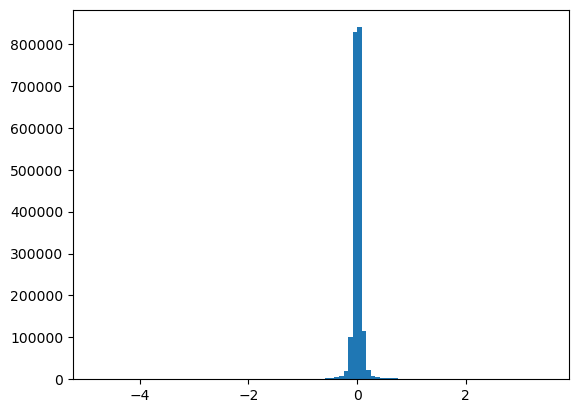

In [13]:
_temp = plt.hist(ack[sf], bins=100)

In [14]:
ack[sf].min()

-4.816192777533576

In [15]:
np.where(np.abs(ack[sf]) > 20.)[0].size

0

In [16]:
np.where(np.abs(ack[sf]) > 20.)[0]

array([], dtype=int64)

In [17]:
nights = data["night"].values[1:]
nights[sf[26866]]

59

In [18]:
in_night = np.where(data["night"] == 59)[0]

In [19]:
np.abs(np.diff(data["rotTelPos"].values[in_night])).max()

0.8366509120703469

In [20]:
np.where(np.abs(np.diff(data["rotTelPos"].values[in_night])) > 30)

(array([], dtype=int64),)

In [21]:
data.iloc[in_night[717]]

rotTelPos                  -61.645247
filter                              r
scheduler_note         pair_33, ur, b
night                              59
fieldRA                    270.775996
fieldDec                   -32.143337
rotSkyPos                   72.449084
observationStartMJD      60855.313044
rotSkyPos_desired                 NaN
rotTelPos_backup           -61.675188
Name: 27619, dtype: object

In [22]:
data.iloc[in_night[718]]

rotTelPos                  -61.623801
filter                              r
scheduler_note         pair_33, ur, b
night                              59
fieldRA                    268.678077
fieldDec                   -29.843233
rotSkyPos                    75.60536
observationStartMJD       60855.31349
rotSkyPos_desired                 NaN
rotTelPos_backup           -61.675188
Name: 27620, dtype: object

In [23]:
data.iloc[in_night[719]]

rotTelPos                  -61.605178
filter                              r
scheduler_note         pair_33, ur, b
night                              59
fieldRA                    266.671416
fieldDec                   -27.450667
rotSkyPos                   78.446295
observationStartMJD      60855.313935
rotSkyPos_desired                 NaN
rotTelPos_backup           -61.675188
Name: 27621, dtype: object

In [24]:
data.iloc[in_night[247]]

rotTelPos                  -60.790813
filter                              r
scheduler_note         pair_33, ur, b
night                              59
fieldRA                    246.007682
fieldDec                   -12.585041
rotSkyPos                  181.821271
observationStartMJD      60855.076242
rotSkyPos_desired                 NaN
rotTelPos_backup           -61.675188
Name: 27149, dtype: object

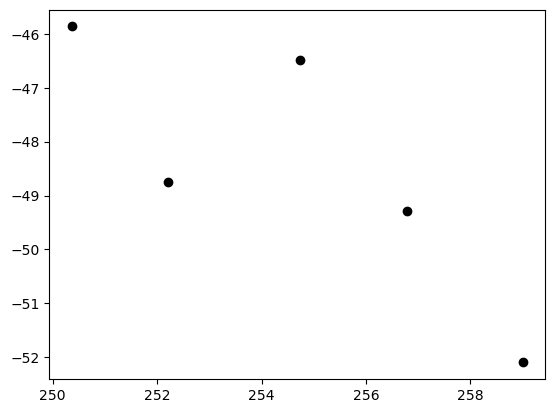

In [25]:
indx = in_night[np.arange(303,308,1)]
plt.plot(data["fieldRA"].values[indx], data["fieldDec"].values[indx], 'ko')

In [18]:
np.diff(data["observationStartMJD"].values[indx])*24*3600

array([38.59938264, 38.57349765, 38.56873694, 38.86543368])

In [19]:
data["rotSkyPos_desired"].values[indx]

array([-178.86738847, -175.27809399, -177.56232733, -174.11748865,
       -179.75610965])

In [20]:
data["rotSkyPos"].values[indx]

array([-178.86738847, -175.27809399, -177.56232733, -174.11748865,
       -179.75610965])

In [21]:
data["rotTelPos"].values[indx]

array([-71.99446293, -71.41481902, -71.19937787, -70.64803293,
       -71.01626423])

In [22]:
data["rotTelPos_backup"].values[indx]

array([-61.67518823, -61.67518823, -61.67518823, -61.67518823,
       -61.67518823])

In [26]:
data.shape

(2042353, 10)